Author: Ricardo Hernández Ramírez 2009070 R9A

# What is a perceptron?

A perceptron is an algorithm that is based on the brain's neurons and how they work.

The perceptron receives input data that is multiplied by a number of weights. Then it is put through an activation function to get a result. If the result is wrong, the perceptron then uses back propagation and gradient descent to return and adjust the weights before the next calculation to try and achieve a correct result.

#Pseudocode


*   Load the training data
*   Count the values of the data
*   Define the sigmoid function and its derivative
*   Establish the weights
*   Define the perceptron
*   Train the perceptron
*   Test the perceptron with a different dataset



In [1]:
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [3]:
iris = pd.read_csv("Iris2species.csv")

In [4]:
iris["Species"].value_counts()

Iris-versicolor    26
Iris-setosa        20
Name: Species, dtype: int64

In [5]:
types = iris.Species.drop_duplicates().values.tolist()
X = iris.drop("Id",axis=1).values
Y = iris["Species"].values

labels = dict(zip(types, range(len(iris))))
result = iris['SpeciesLabel'] = iris['Species'].replace(labels)

We remove the Id column since it will not be necessary.

In [6]:
data = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'SpeciesLabel']].values

The sigmoid function will be our activation function.

In [7]:
def sigmoid(x) :
    return 1/(1 + np.exp(-x))

def sigmoid_p(x) :
    return sigmoid(x) * (1-sigmoid(x))

In this section, we establish the learning rate, weight values, prediction, cost function, and we graph the results.

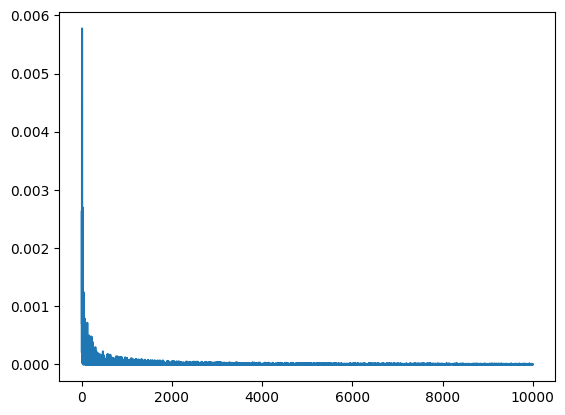

In [8]:
# training loop
learning_rate = 0.2
costs = []

# weights and bias value
w1 = np.random.randn()
w2 = np.random.randn()
w3 = np.random.randn()
w4 = np.random.randn()
b = np.random.randn()

for i in range(1000000) :
    ri = np.random.randint(len(data))
    point = data[ri]
    z = point[0] * w1 + point[1] * w2 + point[2] * w3 + point[3] * w4 + b
    prediction = sigmoid(z)
    target = point[4]

    # cost function (loss)
    cost = np.square(prediction - target)
    dcost_prediction = 2 * (prediction - target)
    dprediction_dz = sigmoid_p(z)

    # our input data & affecting 1 to the bias value
    dz_dw1 = point[0]
    dz_dw2 = point[1]
    dz_dw3 = point[2]
    dz_dw4 = point[3]
    dz_db = 1

    # the slope of the cost function
    dcost_dz = dcost_prediction * dprediction_dz

    # the slope of weights & bias value
    dcost_dw1 = dcost_dz * dz_dw1
    dcost_dw2 = dcost_dz * dz_dw2
    dcost_dw3 = dcost_dz * dz_dw3
    dcost_dw4 = dcost_dz * dz_dw4
    dcost_db = dcost_dz * dz_db

    #Optimization
    # getting the new weights & bias values
    w1 = w1 - learning_rate * dcost_dw1
    w2 = w2 - learning_rate * dcost_dw2
    w3 = w3 - learning_rate * dcost_dw3
    w4 = w4 - learning_rate * dcost_dw4
    b = b - learning_rate * dcost_db

    #Graph
    if i % 100 == 0 :
        cost_sum = 0
        for j in range(len(data)) :
            point = data[ri]

            z = point[0] * w1 + point[1] * w2 + point[2] * w3 + point[3] * w4 + b
            prediction = sigmoid(z)

            target = point[4]
            cost_sum += np.square(prediction - target)

        costs.append(cost_sum/len(data))

plt.plot(costs)



In [9]:
test_data = pd.read_csv("test.csv")

labels = dict(zip(types, range(len(test_data))))
result = test_data['SpeciesLabel'] = test_data['Species'].replace(labels)

data_inputs = test_data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'SpeciesLabel']].values
for i in range(len(data_inputs)) :
    point = data_inputs[i]
    print(point)

    z = point[0] * w1 + point[1] * w2 + point[2] * w3 + point[3] * w4 + b
    prediction = sigmoid(z)
    target = point[4]

    print("prediction : {}" .format(prediction))

[5.4 3.4 1.7 0.2 0. ]
prediction : 0.0012149851540331066
[5.1 3.7 1.5 0.4 0. ]
prediction : 0.0006137416527766358
[4.6 3.6 1.  0.2 0. ]
prediction : 8.47014575291077e-05
[5.1 3.3 1.7 0.5 0. ]
prediction : 0.004840645409546022
[4.8 3.4 1.9 0.2 0. ]
prediction : 0.006525141434396089
[5.  3.  1.6 0.2 0. ]
prediction : 0.003066429402232067
[5.  3.4 1.6 0.4 0. ]
prediction : 0.0021421082786060404
[5.2 3.5 1.5 0.2 0. ]
prediction : 0.0004982466063064043
[5.2 3.4 1.4 0.2 0. ]
prediction : 0.0003912447144270854
[4.7 3.2 1.6 0.2 0. ]
prediction : 0.0028860060264361206
[4.8 3.1 1.6 0.2 0. ]
prediction : 0.003169038363411596
[5.4 3.4 1.5 0.4 0. ]
prediction : 0.0008131293004378453
[5.2 4.1 1.5 0.1 0. ]
prediction : 0.000102080491304641
[5.5 4.2 1.4 0.2 0. ]
prediction : 4.5766688405232824e-05
[4.9 3.1 1.5 0.1 0. ]
prediction : 0.0013556253837410431
[5.  3.2 1.2 0.2 0. ]
prediction : 0.000310873894633457
[5.5 3.5 1.3 0.2 0. ]
prediction : 0.000135066107101933
[4.9 3.1 1.5 0.1 0. ]
prediction : 0.0